# Propagación de la afinidad

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

/home/cesar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
centers = [[1,1],[-1,-1],[1,-1]]
x, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle

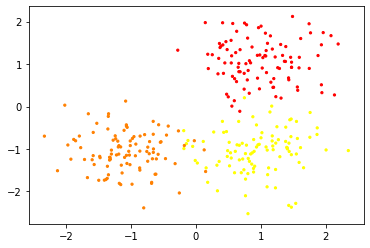

In [4]:
plt.scatter(x[:,0],x[:,1],c=labels, cmap="autumn", s=5)

In [5]:
af = AffinityPropagation(preference =-50).fit(x) #modelo de propagacion de la afinidad, preference es el valor incial

In [6]:
cluster_center_id= af.cluster_centers_indices_

In [13]:
labels = af.labels_  ## son las etiquetas de cada punto, a que cluster pertenecen
labels

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0, 0, 0, 1, 0,
       2, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 0, 2, 1, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1,
       1, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 1,
       0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1])

In [8]:
n_clust = len(cluster_center_id)
n_clust

3

In [16]:
def report_affinity_propagation(x):
    af = AffinityPropagation(preference = -45).fit(x)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_id)
    clust_labels = af.labels_
    print(clust_labels)
    print("Número estimado de clusters: %d"%n_clust)
    print("homogeneidad: %0.3f"%metrics.homogeneity_score(labels,clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels,clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels,clust_labels))
    print("R2 ajuistado: %0.3f"%metrics.adjusted_rand_score(labels,clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels,clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(x,labels,metric="sqeuclidean"))

    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle("bgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clust),colors):
        class_members = (clust_labels==k)
        clust_center = x[cluster_center_ids[k]]
        plt.plot(x[class_members,0],x[class_members,1],col + ".")
        plt.plot(clust_center[0],clust_center[1],"o",markerfacecolor=col, markeredgecolor="k",markersize=14)
        for j in x[class_members]: ##sirve para trazar las lineas desde elcentro al punto
            plt.plot([clust_center[0],j[0]],[clust_center[1],j[1]],col)
            
    plt.title("numero estimado de clusters %d"%n_clust)
    plt.show()

[0 1 2 0 0 2 1 1 2 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 2 1 2 2 1 0 2 1 2 2
 2 2 0 0 0 1 0 2 1 1 1 1 0 0 0 1 2 2 2 2 0 2 0 1 2 2 1 1 1 2 1 2 0 2 1 0 0
 1 1 2 2 0 1 2 0 1 2 2 0 0 1 1 0 2 0 2 0 2 0 2 1 0 1 0 0 1 0 0 2 2 1 2 2 2
 2 2 1 0 2 0 1 2 1 2 2 2 2 2 2 0 1 1 1 0 1 1 2 0 2 0 1 2 0 1 1 2 0 1 0 2 1
 2 2 2 0 0 0 2 0 2 0 0 0 0 1 2 0 1 1 1 2 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 2 1
 0 2 1 0 2 2 2 0 1 2 1 0 1 0 1 0 0 1 2 2 2 2 0 1 1 0 2 2 2 0 1 0 0 1 0 2 2
 0 2 1 1 1 0 0 2 1 1 1 2 1 0 2 2 0 2 2 1 0 1 1 0 0 1 0 1 1 1 2 0 1 1 0 2 2
 2 2 0 0 0 0 0 1 1 2 0 0 2 2 2 1 2 1 2 2 1 1 1 2 1 0 1 2 0 1 2 2 1 2 2 2 1
 0 2 1 1]
Número estimado de clusters: 3
homogeneidad: 1.000
Completitud: 1.000
V-measure: 1.000
R2 ajuistado: 1.000
Información mútua ajustada: 1.000
Coeficiente de la silueta: 0.753


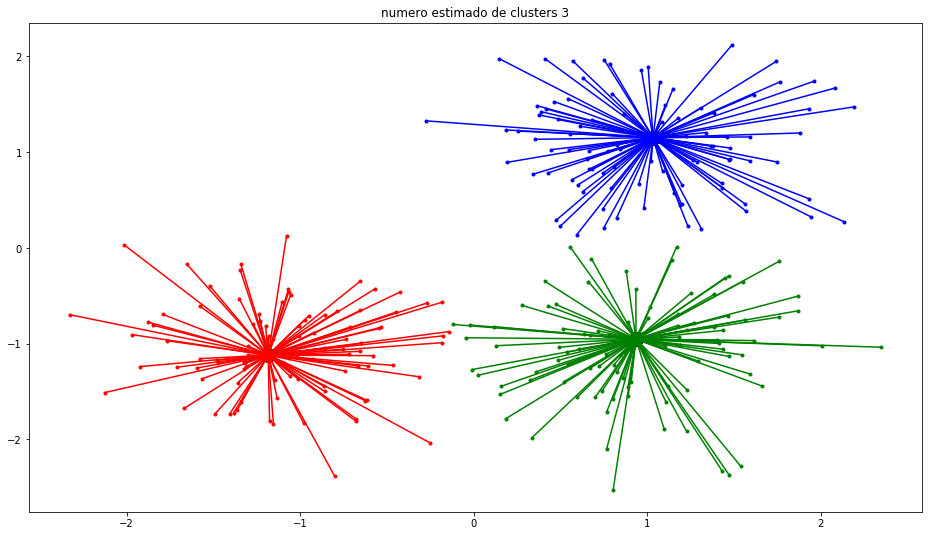

In [17]:
report_affinity_propagation(x)